In [1]:
# setup
library("readxl")
library("dplyr")
library("tidyr")
library("tibble")
library("stringr")
library("PCAtools")
library("viridis")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: ggrepel


Attaching package: 'PCAtools'


The following objects are masked from 'package:stats':

    biplot, screeplot


Loading required package: viridisLite



In [2]:
# colnames might be somehow extrated from here
readLines("test_data/metasub_urban/output/motus-profiler/mOTU_taxonomic_profile/merged_profile.txt")[2]

[1] "# call: python /lustre/scratch126/casm/team268im/dh24/conda/envs/motus-profiler/bin/../share/motus-2.5.1//motus merge -i metasub_urban_1/taxonomic_profile.txt,metasub_urban_2/taxonomic_profile.txt,metasub_urban_3/taxonomic_profile.txt -o merged_profile.txt"

In [3]:
# load the data
otu <- read.csv("test_data/metasub_urban/output/motus-profiler/mOTU_taxonomic_profile/merged_profile.txt",
         sep="\t", skip=2, col.names = c("Species", "metasub_urban_1", "metasub_urban_2", "metasub_urban_3"))
metadata <- read.csv("test_data/metasub_urban/input/metasub_urban.csv") %>%
    column_to_rownames(var = "sample_name")

otu$Species[otu$Species == '-1'] <- 'unidentified'

# match the rows in meta to cols in otu (needed for PCA)
metadata <- metadata[match(colnames(otu[,-1]), rownames(metadata)),]

Issues
* sample names in otu table were set manualy
* '-1' species changed to unidentified

# Barplot

In [4]:
bar_data <- otu %>%    
    pivot_longer(!Species, names_to = "Sample", values_to = "Abundance")
bar_data$Species <- str_remove(bar_data$Species, " \\[.*") 
# group low abundant species
bar_data$Species[bar_data$Abundance < 0.05] <- "< 5%"

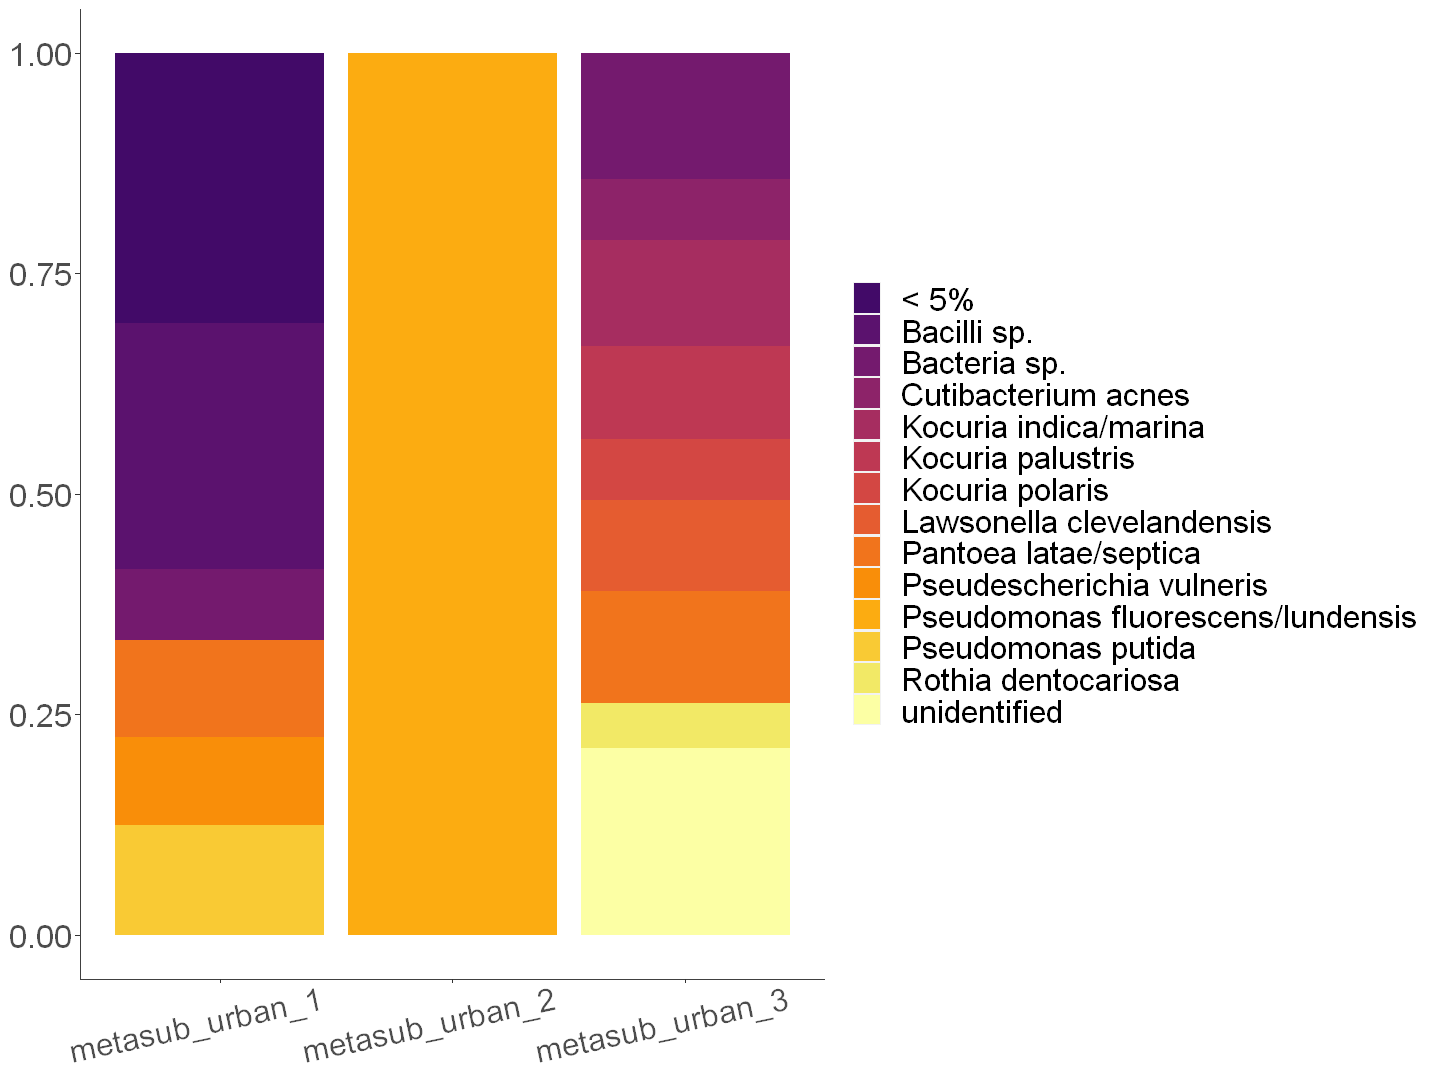

In [5]:
options(repr.plot.width=12, repr.plot.height=9) 
ggplot(bar_data, aes(y=Abundance, x=Sample, fill=Species)) +
  geom_bar(stat="identity") +
  labs(x=NULL, y=NULL, fill=NULL) +
  scale_fill_viridis(option = "inferno", discrete = TRUE, begin=0.2) +
  theme(panel.background = element_blank(),
        axis.line = element_line(colour = "grey25"),
        text = element_text(size = 24),
        axis.text.x = element_text(angle = 12, hjust = 0.6, vjust = 0.68))

# PCA

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


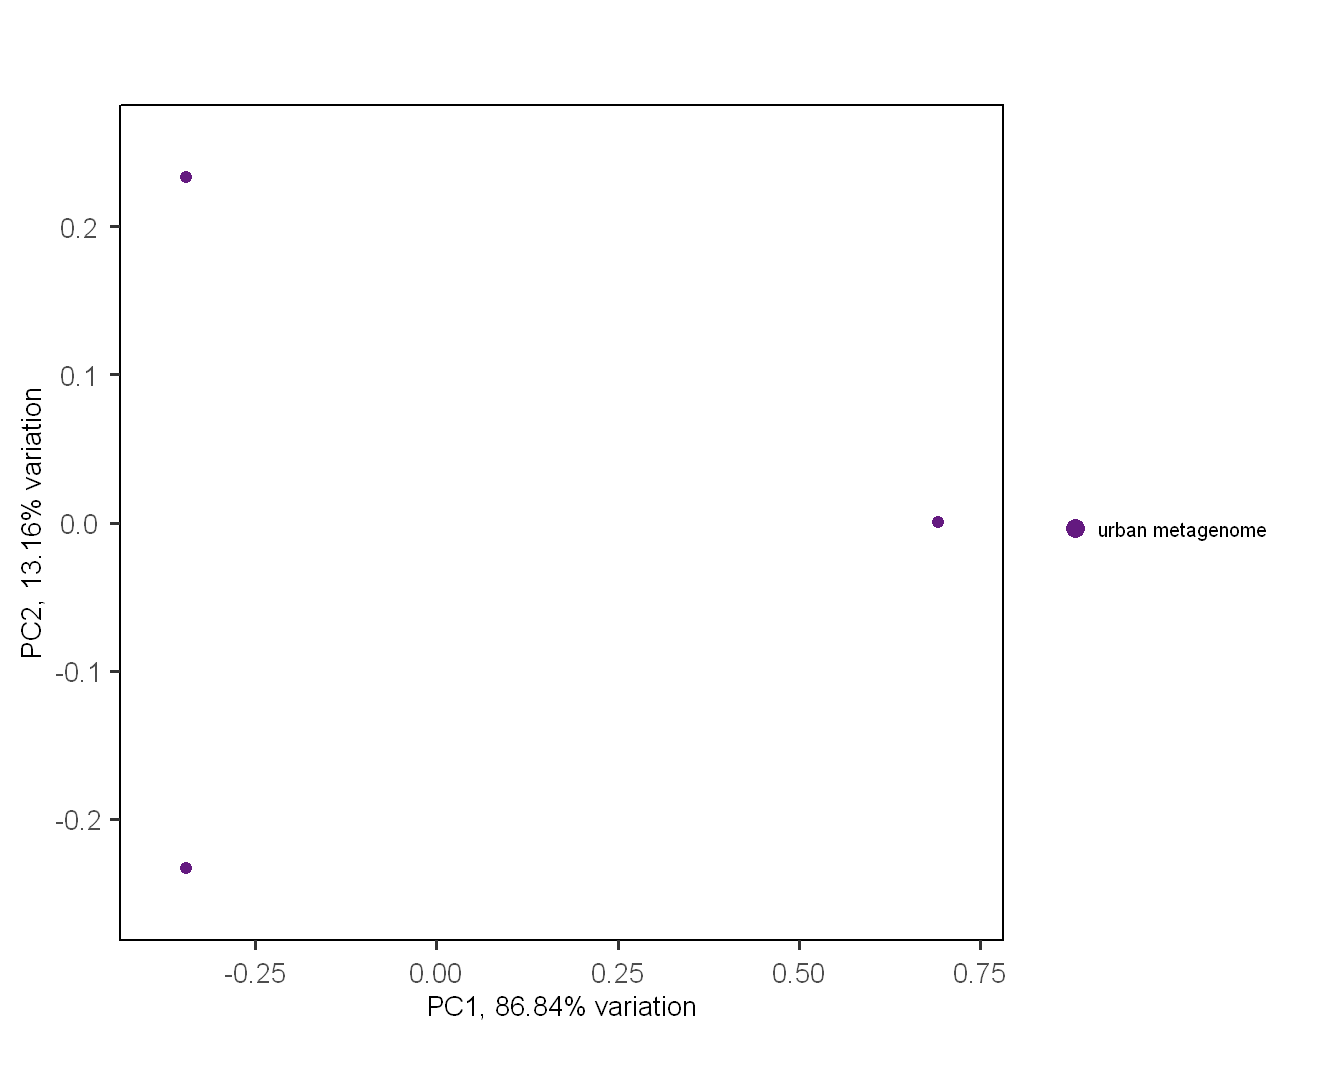

In [6]:
options(repr.plot.width=11, repr.plot.height=9) 
pca<- pca(otu[,-1], metadata=metadata) # ? , removeVar=0.1
biplot(pca, colby="scientific.name", legendPosition = "right", lab=NULL,
       gridlines.major = FALSE, gridlines.minor = FALSE, colLegendTitle = NULL,
       colkey = magma(n = n_distinct(metadata), begin = 0.3))

# Heatmap

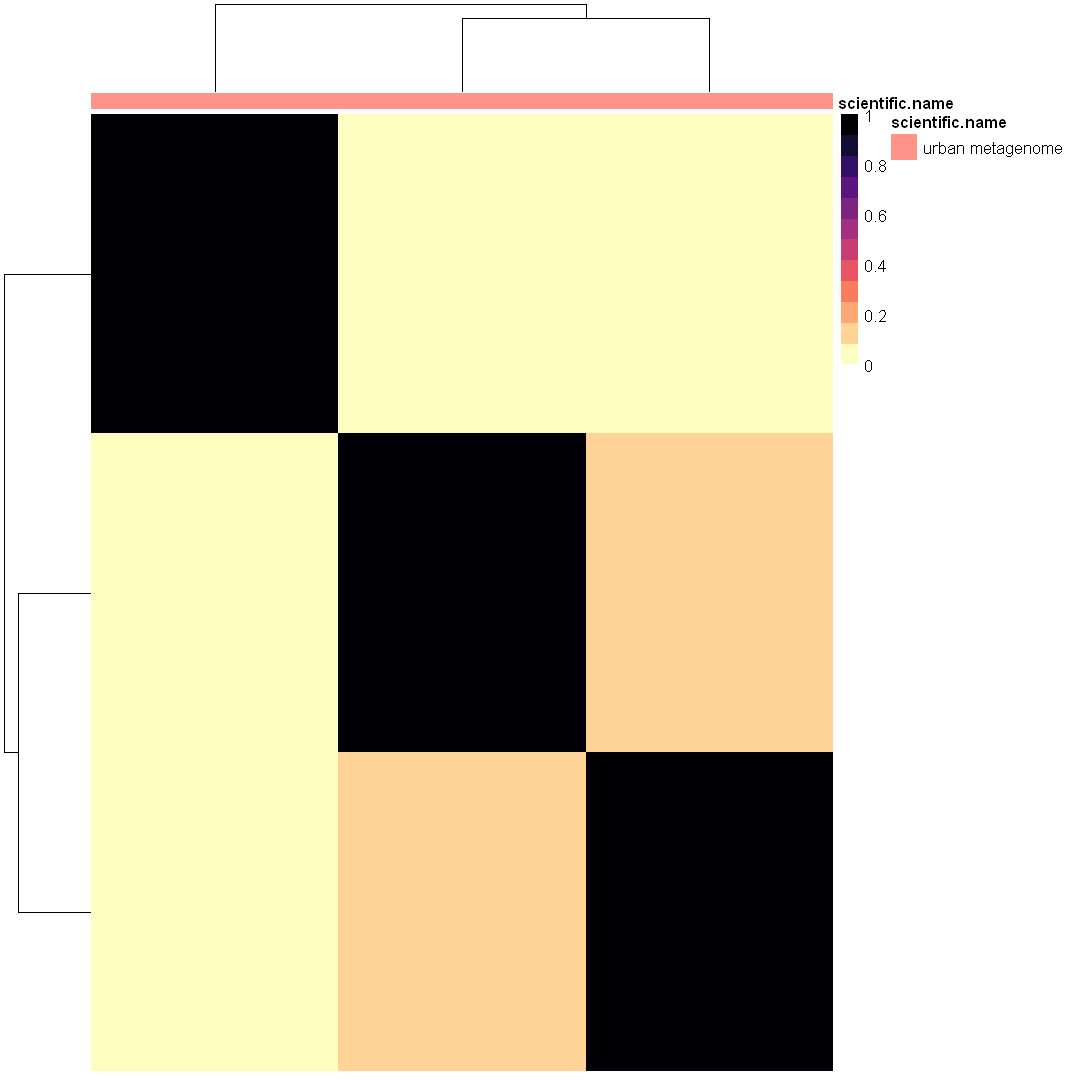

In [7]:
library(pheatmap)
corr_matrix <- cor(otu[,-1])
options(repr.plot.width=9, repr.plot.height=9) 

pheatmap(corr_matrix,annotation=metadata[][3],
         show_colnames = FALSE, show_rownames = FALSE,
         color = magma(12, direction=-1), annotation_colors = viridis(n=0), border_color = NA)
         #treeheight_col = 24, treehight_row = 12,
         #cellwidth = 180, cellheigth = 30